# Kaggle Recipes dataset EDA
~~~
- 불필요한 컬럼 삭제 한 후 재료에 대한 분포 확인
- 재료에 대한 전처리 진행
    - 불필요한 컬럼 삭제 tags, contributor_id, submitted
    - minutes 확인하여 0인 값 15로 대체

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import pickle
from nltk.corpus import stopwords
import re

## 컬럼 정리
- nutrition 컬럼 풀어서 각 컬럼으로 생성
- 필요 없는 id, contributor_id, submitted, tags , nutrition 컬럼 삭제

In [2]:
df = pd.read_csv('./recipes/RAW_recipes.csv')
df.head(1)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7


In [3]:
df

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22
231633,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13
231634,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


In [5]:
# nutrition 정리
df[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']] = df.nutrition.str.split(",",expand=True)
df['calories'] =  df['calories'].apply(lambda x: x.replace('[','')) 
df['carbohydrates'] =  df['carbohydrates'].apply(lambda x: x.replace(']','')) 
df[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']] = df[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']].astype('float')

In [6]:
zero_minutes_rows = df[df['minutes'] == 0]
zero_minutes_rows.head(1)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,calories,total fat,sugar,sodium,protein,saturated fat,carbohydrates
5,apple a day milk shake,5289,0,1533,1999-12-06,"['15-minutes-or-less', 'time-to-make', 'course...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"['combine ingredients in blender', 'cover and ...",NaN,"['milk', 'vanilla ice cream', 'frozen apple ju...",4,160.2,10.0,55.0,3.0,9.0,20.0,7.0


In [7]:
df.loc[df['minutes'] == 0, 'minutes'] = 15
zero_minutes_rows.head(1)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,calories,total fat,sugar,sodium,protein,saturated fat,carbohydrates
5,apple a day milk shake,5289,0,1533,1999-12-06,"['15-minutes-or-less', 'time-to-make', 'course...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"['combine ingredients in blender', 'cover and ...",NaN,"['milk', 'vanilla ice cream', 'frozen apple ju...",4,160.2,10.0,55.0,3.0,9.0,20.0,7.0


In [8]:
# 팔요 없는 컬럼 삭제
df.drop(['contributor_id','submitted','tags','nutrition'], axis=1,inplace = True)

In [9]:
df1 = df.copy()

### Name Column

In [10]:
# 똑같은 요리가 있는 행 확인
name_counts = df1['name'].value_counts()
name_counts

name
crock pot lemon garlic chicken                  3
gluten free chocolate chip cookies              3
chocolate peanut butter cookies                 3
three bean chili                                3
pop up rolls                                    3
                                               ..
easy pineapple cake                             1
easy pineapple chicken                          1
easy pineapple chili                            1
easy pineapple dessert                          1
cookies by design   sugar shortbread cookies    1
Name: count, Length: 230185, dtype: int64

In [11]:
pop_up_rolls_df = df1[df1['name'] == 'pop up rolls']
pop_up_rolls_df

,name,id,minutes,n_steps,steps,description,ingredients,n_ingredients,calories,total fat,sugar,sodium,protein,saturated fat,carbohydrates
162517,pop up rolls,197045,30,6,['please be sure to use self rising flour and ...,my mother-in-law shared this easy recipe with ...,"['self rising flour', 'milk', 'sugar', 'mayonn...",4,112.6,2.0,17.0,12.0,5.0,3.0,7.0
162525,pop up rolls,272180,25,5,"['in a bowl , stir together all ingredients un...",another recipe i've had since my newlywed days...,"['all-purpose flour', 'baking powder', 'salt',...",6,122.6,4.0,17.0,12.0,5.0,8.0,7.0
162526,pop up rolls,49986,25,3,"['combine everything', 'fill greased muffin ti...",very easy and great with soup or stew,"['self rising flour', 'milk', 'sugar', 'mayonn...",4,112.6,2.0,17.0,12.0,5.0,3.0,7.0


In [12]:
# 요리는 같은데 레시피가 조금 달라 조리 순서가 적은 것으로 남김
for name, count in name_counts.items():
    if count >= 2:
        min_n_step = df1[df1['name'] == name]['n_steps'].min()
        df.drop(df1[(df1['name'] == name) & (df1['n_steps'] > min_n_step)].index, inplace=True)
name_counts = df1['name'].value_counts()
name_counts

name
crock pot lemon garlic chicken                  3
gluten free chocolate chip cookies              3
chocolate peanut butter cookies                 3
three bean chili                                3
pop up rolls                                    3
                                               ..
easy pineapple cake                             1
easy pineapple chicken                          1
easy pineapple chili                            1
easy pineapple dessert                          1
cookies by design   sugar shortbread cookies    1
Name: count, Length: 230185, dtype: int64

In [13]:
# 요리 순서도 동일 한것이 있어 처음에 나온 값으로 남김
# 동일한 이름을 가진 행을 삭제
df1 = df1.drop_duplicates(subset='name', keep='first')
name_counts = df1['name'].value_counts()
name_counts


name
arriba   baked winter squash mexican style        1
paul newman s best dip ever                       1
patisa  soan papdi                                1
patout s hot crab dip                             1
patranque  bread and bacon pancake from france    1
                                                 ..
easy noodle kugel                                 1
easy noodle pizza                                 1
easy noodles in garlic ginger peanut sauce        1
easy nova scotia carrot cake                      1
cookies by design   sugar shortbread cookies      1
Name: count, Length: 230185, dtype: int64

## Ingredients 컬럼

In [14]:
# 'ingredients' 컬럼의 유니크한 값들 찾기
unique_ingredients = df1['ingredients'].unique()
len(unique_ingredients)

229052

In [15]:
# ingredients 컬럼의 문자열을 리스트로 변환하여 각 재료를 개별 컬럼에 저장
df1['ingredients'] = df1['ingredients'].apply(eval)
df1 = pd.concat([df1, df1['ingredients'].apply(pd.Series)], axis=1).drop(columns='ingredients')
df1.head(1)

,name,id,minutes,n_steps,steps,description,n_ingredients,calories,total fat,sugar,...,33,34,35,36,37,38,39,40,41,42
0,arriba baked winter squash mexican style,137739,55,11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,7,51.5,0.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230186 entries, 0 to 231636
Data columns (total 57 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   name           230185 non-null  object 
 1   id             230186 non-null  int64  
 2   minutes        230186 non-null  int64  
 3   n_steps        230186 non-null  int64  
 4   steps          230186 non-null  object 
 5   description    225249 non-null  object 
 6   n_ingredients  230186 non-null  int64  
 7   calories       230186 non-null  float64
 8   total fat      230186 non-null  float64
 9   sugar          230186 non-null  float64
 10  sodium         230186 non-null  float64
 11  protein        230186 non-null  float64
 12  saturated fat  230186 non-null  float64
 13  carbohydrates  230186 non-null  float64
 14  0              230186 non-null  object 
 15  1              230161 non-null  object 
 16  2              228043 non-null  object 
 17  3              221276 non-null  ob

~~~
- 총 43개를 재료를 가지고 있는 레시피가 있어 컬럼이 총 45개가 되었음

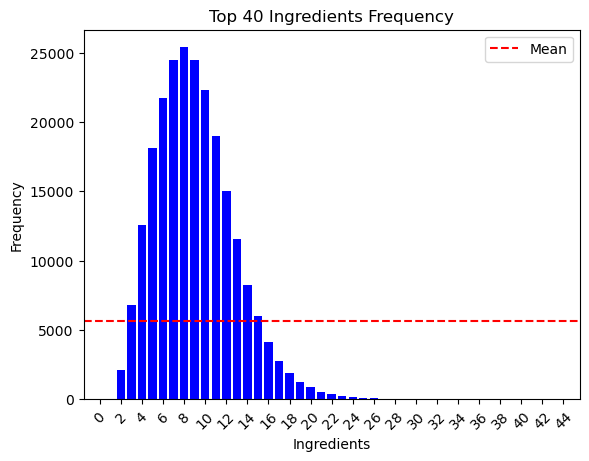

In [17]:
# 'ingredients' 컬럼에서 중복되는 값들과 개수 계산
n_ingredient_counts = df1['n_ingredients'].value_counts()

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 평균치 계산
mean_frequency = n_ingredient_counts.mean()
top_n = 40
plt.bar(n_ingredient_counts.index, n_ingredient_counts.values, color='b')
plt.axhline(mean_frequency, color='r', linestyle='dashed', label='Mean')
plt.xlabel('Ingredients')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Ingredients Frequency')
plt.xticks(rotation=45)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=2))

plt.legend()
plt.show()

~~~
- 재료의 분포를 보고 싶어 막대그래프로 확인하고 평균치를 표시해 maximum으로 설정할 갯수 확인

In [18]:
df_ingredients = df1.copy()


In [19]:
# 컬럼 이름 15이후로 NaN값이 아닌 행들을 모두 삭제
df_ingredients = df_ingredients.iloc[:, :29]
df_ingredients = df_ingredients.dropna(subset=df_ingredients.columns[30:], how='any')

df_ingredients.head(1)

,name,id,minutes,n_steps,steps,description,n_ingredients,calories,total fat,sugar,...,5,6,7,8,9,10,11,12,13,14
0,arriba baked winter squash mexican style,137739,55,11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,7,51.5,0.0,13.0,...,olive oil,salt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df2 = df_ingredients.copy()

In [21]:
df2 = df2.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230186 entries, 0 to 231636
Data columns (total 29 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   name           230185 non-null  object 
 1   id             230186 non-null  int64  
 2   minutes        230186 non-null  int64  
 3   n_steps        230186 non-null  int64  
 4   steps          230186 non-null  object 
 5   description    225249 non-null  object 
 6   n_ingredients  230186 non-null  int64  
 7   calories       230186 non-null  float64
 8   total fat      230186 non-null  float64
 9   sugar          230186 non-null  float64
 10  sodium         230186 non-null  float64
 11  protein        230186 non-null  float64
 12  saturated fat  230186 non-null  float64
 13  carbohydrates  230186 non-null  float64
 14  0              230186 non-null  object 
 15  1              230161 non-null  object 
 16  2              228043 non-null  object 
 17  3              221276 non-null  ob

In [23]:
# 키워드를 포함하는 모든 단어는 value값으로 변경 
def replace_keywords_with_value(df, start_col, end_col, keyword, value):
    df.iloc[:, start_col:end_col] = df.iloc[:, start_col:end_col].apply(lambda x: x.str.replace(f'.*{keyword}.*', value, case=False, regex=True))
    return df

In [24]:
df2 = replace_keywords_with_value(df2, 14, 29, 'salt', 'salt')
df2 = replace_keywords_with_value(df2, 14, 29, 'flour', 'flour')
df2 = replace_keywords_with_value(df2, 14, 29, 'vinegar', 'vinegar')
df2 = replace_keywords_with_value(df2, 14, 29, 'butter', 'butter')
df2 = replace_keywords_with_value(df2, 14, 29, 'garlic', 'garlic')
df2 = replace_keywords_with_value(df2, 14, 29, 'pepper', 'pepper')
df2 = replace_keywords_with_value(df2, 14, 29, 'onion', 'onion')
df2 = replace_keywords_with_value(df2, 14, 29, 'cubes', 'cube')
df2 = replace_keywords_with_value(df2, 14, 29, 'cube', 'cube')
df2 = replace_keywords_with_value(df2, 14, 29, 'stock', 'stock')
df2 = replace_keywords_with_value(df2, 14, 29, 'sugar', 'sugar')
df2 = replace_keywords_with_value(df2, 14, 29, 'noodle', 'noodle')
df2 = replace_keywords_with_value(df2, 14, 29, 'rice', 'rice')
df2 = replace_keywords_with_value(df2, 14, 29, 'rib', 'rib')
df2 = replace_keywords_with_value(df2, 14, 29, 'egg', 'egg')
df2 = replace_keywords_with_value(df2, 14, 29, 'milk', 'milk')
df2 = replace_keywords_with_value(df2, 14, 29, 'tofu', 'tofu')
df2 = replace_keywords_with_value(df2, 14, 29, 'oil', 'oil')
df2 = replace_keywords_with_value(df2, 14, 29, 'cheese', 'cheese')

In [25]:
# 값의 포함된 단어만 삭제
df2.iloc[:, 14:29] = df2.iloc[:, 14:29].apply(lambda x: x.str.replace('fresh', '', case=False))
df2.iloc[:, 14:29] = df2.iloc[:, 14:29].apply(lambda x: x.str.replace('ground', '', case=False))
df2.iloc[:, 14:29] = df2.iloc[:, 14:29].apply(lambda x: x.str.replace('grounded', '', case=False))
df2.iloc[:, 14:29] = df2.iloc[:, 14:29].apply(lambda x: x.str.replace('dry', '', case=False))
df2.iloc[:, 14:29] = df2.iloc[:, 14:29].apply(lambda x: x.str.replace('dried', '', case=False))
df2.iloc[:, 14:29] = df2.iloc[:, 14:29].apply(lambda x: x.str.replace('stem', '', case=False))
df2.iloc[:, 14:29] = df2.iloc[:, 14:29].apply(lambda x: x.str.replace('bulb', '', case=False))
df2.iloc[:, 14:29] = df2.iloc[:, 14:29].apply(lambda x: x.str.replace('floret', '', case=False))

~~~
- 표를 보면서 불 필요하다고 생각이 되는 형용사, 부사는 삭제

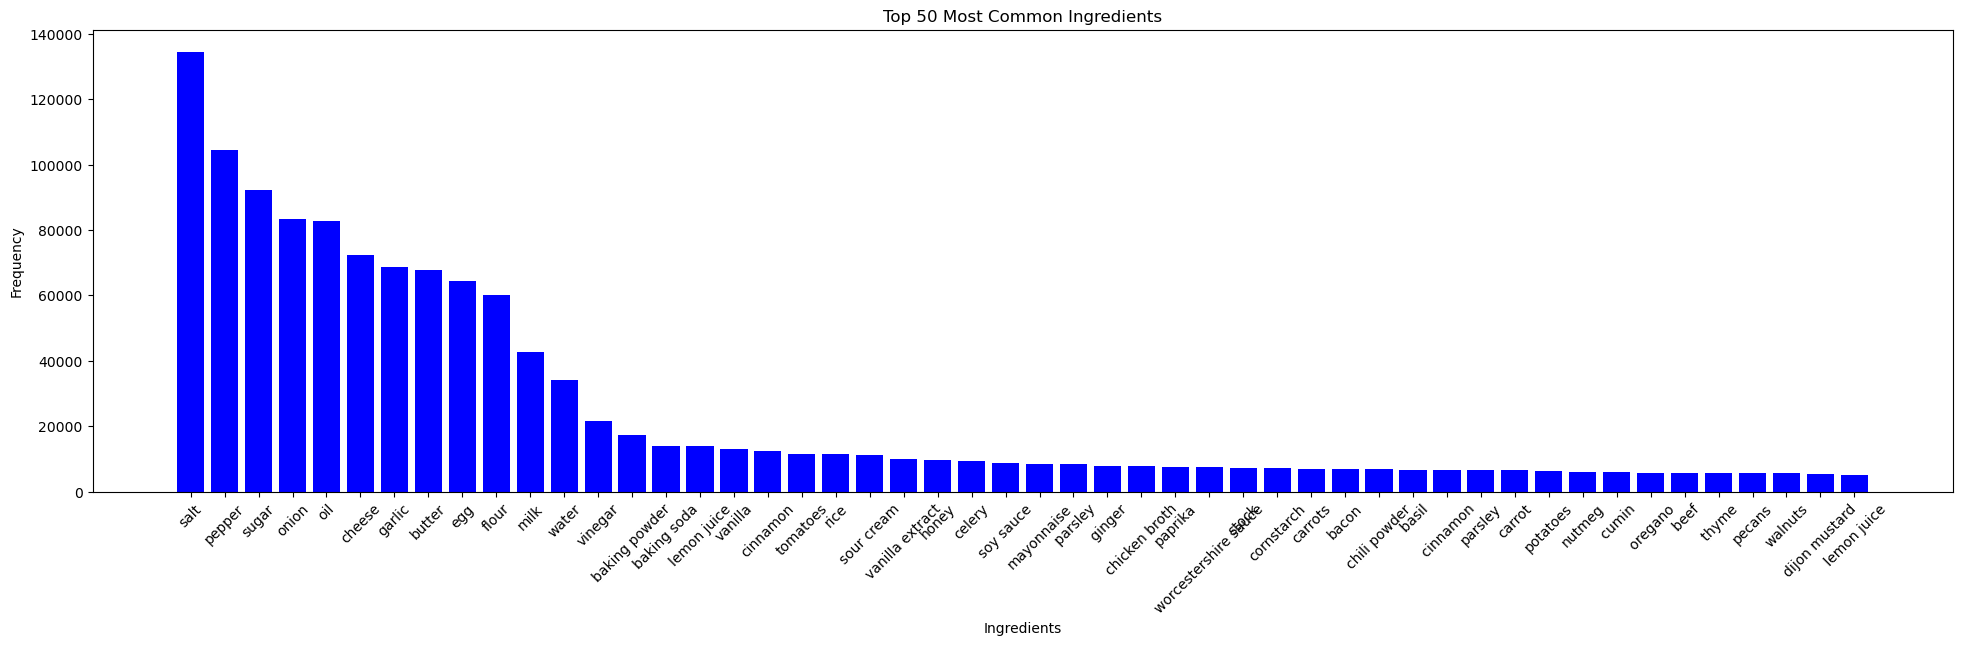

In [26]:
words_list = df2[df2.columns[14:29]].values.flatten()

word_counts = pd.Series(words_list).value_counts()

top_n = 50 
top_words = word_counts.head(top_n)

plt.figure(figsize=(24,6))
plt.bar(top_words.index, top_words.values, color='b')
plt.xlabel('Ingredients')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Most Common Ingredients')
plt.xticks(rotation=45)
plt.show()

~~~
- 가장 많이 카운트된 값들을 확인을 함.
- oil, herb 등 조미료가 가장 많이 확인이 되었다.

### herb, oil, powder, paste

In [27]:
spices_and_herbs = [
    'allspice', 'anise', 'basil', 'bay leaf', 'cardamom', 'cayenne pepper',
    'chili powder', 'cinnamon', 'cloves', 'coriander', 'cumin', 'curry powder',
    'dill', 'fennel', 'ginger', 'marjoram', 'mustard seeds', 'nutmeg',
    'oregano', 'paprika', 'parsley', 'rosemary', 'saffron', 'sage', 'star anise',
    'tarragon', 'thyme', 'turmeric', 'vanilla'
]

In [28]:
spices_and_herbs = [item for item in spices_and_herbs if df2.iloc[:, 14:29].isin([item]).any().any()]
print(spices_and_herbs)

['allspice', 'anise', 'basil', 'bay leaf', 'cardamom', 'chili powder', 'cinnamon', 'cloves', 'coriander', 'cumin', 'curry powder', 'dill', 'fennel', 'ginger', 'marjoram', 'mustard seeds', 'nutmeg', 'oregano', 'paprika', 'parsley', 'rosemary', 'saffron', 'sage', 'star anise', 'tarragon', 'thyme', 'turmeric', 'vanilla']


In [29]:
oil_values_list = df2.iloc[:, 14:29].values.flatten()
oil_values_list = [value for value in oil_values_list if str(value).endswith('oil')]
oil_values_list = list(set(oil_values_list))
print(oil_values_list)

['oil']


In [30]:
powder_values_list = df2.iloc[:, 14:29].values.flatten()
powder_values_list = [value for value in powder_values_list if str(value).endswith('powder')]
powder_values_list = list(set(powder_values_list))
print(powder_values_list)

['chicken bouillon powder', 'pectic enzyme powder', 'horseradish powder', 'coriander powder', 'vanilla powder', 'jeera powder', 'bisto powder', 'greens powder', 'chana dal powder', 'sambal powder', ' lime powder', 'vitamin c powder', 'gelatin powder', 'espresso powder', 'paint powder', 'dark chili powder', 'chia powder', 'low-sodium beef bouillon powder', 'pomegranate powder', 'cayenne powder', 'frypowder', 'thai tea powder', ' chipotle powder', 'bovril powder', 'whipped cream powder', 'galanga powder', 'mild curry powder', 'soy powder', 'chocolate whey protein powder', 'low-fat drinking cocoa powder', 'turmeric powder', 'chicken curry powder', ' coconut powder', 'chile powder', 'beef bouillon powder', 'vegan chicken bouillon powder', 'dashi powder', 'fennel powder', 'chinese five spice powder', ' chile piquin powder', 'postum instant drink powder', 'unsweetened alkalized cocoa powder', 'hazelnut powder', 'cocoa powder', 'sambhar powder', 'celery powder', 'baking powder', 'sesame powde

In [31]:
paste_values_list = df2.iloc[:, 14:29].values.flatten()
paste_values_list = [value for value in paste_values_list if str(value).endswith('paste')]
paste_values_list = list(set(paste_values_list))
print(paste_values_list)

['marzipan paste', 'thai red curry paste', 'charmagaj paste', 'tom kha paste', 'red food coloring paste', 'anchovy paste', 'yellow food coloring paste', 'red curry paste', 'tahini paste', 'tikka paste', 'concentrated tomato paste', 'sun- tomato paste', 'chili paste', 'sambal chili paste', 'praline paste', 'beef bouillon paste', 'masala paste', 'huacatay paste', 'contadina tomato paste', 'sweet bean paste', 'ginger and chili paste', 'panang curry paste', 'mild curry paste', 'green chili paste', 'red azuki bean paste', 'bean paste', 'reduced-sodium tomato paste', 'red chili paste', 'pimento paste', 'tom yam paste', 'chili bean paste', 'sodium-free tomato paste', 'aji yellow paste', 'purple food coloring paste', 'papaya paste', 'tamarind paste', 'cilantro paste', 'cornstarch paste', 'wasabi paste', 'shrimp paste', 'hunts tomato paste', 'gum paste', 'parsley paste', 'italian tomato paste', 'italian-style tomato paste', 'black bean paste', 'low-sodium tomato paste', 'red bean paste', 'cocon

In [32]:
sauce_values_list = df2.iloc[:, 14:29].values.flatten()
sauce_values_list = [value for value in sauce_values_list if str(value).endswith('sauce')]
sauce_values_list = list(set(sauce_values_list))
print(sauce_values_list)

['spice plum sauce', 'green tomatillo sauce', 'unsweetened chunky applesauce', 'plum sauce', 'red hot sauce', 'caramel sauce', 'chunky tomato pasta sauce', 'lea & perrins white wine worcestershire sauce', 'primavera pasta sauce', "mott's cinnamon applesauce", 'hot dog sauce', 'tsuyu sauce', 'sweet and sour plum sauce', 'yellow bean sauce', 'worcestershire sauce', 'hunts tomato sauce', 'natural applesauce', 'chunky picante sauce', 'kikkoman soy sauce', 'parsley sauce', 'satay sauce', 'bean sauce', 'low sodium spaghetti sauce', 'shredded chicken with barbecue sauce', 'red pesto sauce', 'mushroom soy sauce', 'vegan sweet and sour sauce', 'parmesan and mozzarella pasta sauce', 'red chili sauce', 'tabasco jalapeno sauce', 'reduced-sodium tomato sauce', 'au jus sauce', 'thai fish sauce', 'ragu parmesan and romano spaghetti sauce', 'thai sweet chili sauce', 'shrimp sauce', 'canned whole cranberry sauce', 'browning sauce', 'green goddess sauce', 'strawberry sauce', 'sun- tomato alfredo sauce',

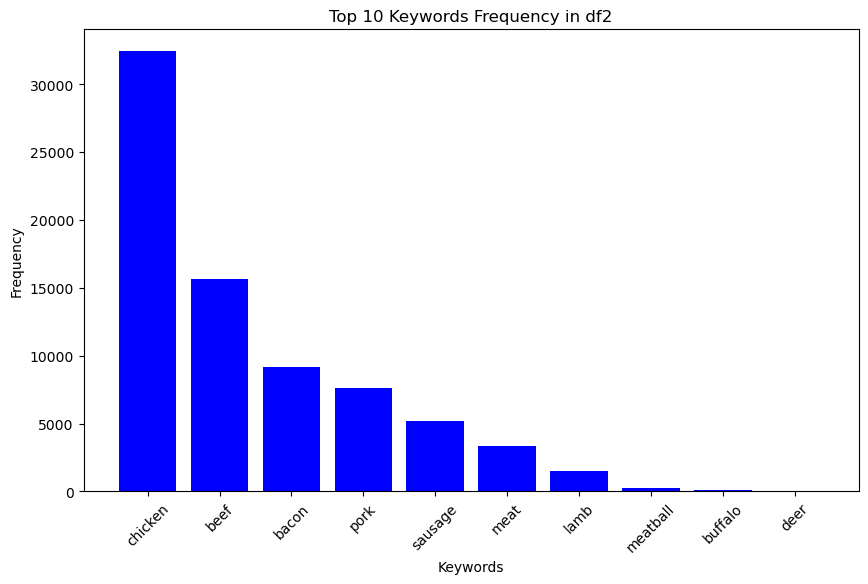

In [33]:
keywords = ['pork', 'chicken', 'lamb', 'beef', 'alligator', 'sausage', 'meat', 'deer', 'buffalo', 'meatball', 'bacon']

keyword_counts = {}
for keyword in keywords:
    count = sum(df2[df2.columns[14:29]].apply(lambda x: x.str.contains(keyword, case=False, regex=True)).any(axis=1))
    keyword_counts[keyword] = count

sorted_keywords = sorted(keyword_counts.items(), key=lambda x: x[1], reverse=True)

top_n = 10
top_keywords = [keyword[0] for keyword in sorted_keywords[:top_n]]
top_frequencies = [keyword[1] for keyword in sorted_keywords[:top_n]]

plt.figure(figsize=(10, 6))
plt.bar(top_keywords, top_frequencies, color='b')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Keywords Frequency in df2')
plt.xticks(rotation=45)
plt.show()

In [34]:
# 값이 있다면 하나의 값으로 대체
df2.iloc[:, 14:29] = df2.iloc[:, 14:29].apply(lambda x: x.str.replace('.*broth.*', 'broth', case=False, regex=True))
df2.iloc[:, 14:29] = df2.iloc[:, 14:29].apply(lambda x: x.str.replace('.*soup.*', 'soup', case=False, regex=True))
df2.iloc[:, 14:29] = df2.iloc[:, 14:29].apply(lambda x: x.str.replace('.*meatball.*', 'meatball', case=False, regex=True))
df2.iloc[:, 14:29] = df2.iloc[:, 14:29].apply(lambda x: x.str.replace('.*meatballs.*', 'meatball', case=False, regex=True))
df2.iloc[:, 14:29] = df2.iloc[:, 14:29].apply(lambda x: x.str.replace('.*rib.*', 'rib', case=False, regex=True))

In [35]:
df3 = df2.copy()

## Type 설정

In [36]:
# 재료 컬럼에 vegan, vegetarian이라는 단어를 포함하고 있으면 분류
def get_type(row):
    if pd.notna(row).any():
        if any('vegan' in word for word in row if pd.notna(word)):
            return 'vegan'
        elif any('vegetarian' in word for word in row if pd.notna(word)):
            return 'vegetarian'
    return ''

df3['vege/vegan'] = df3.iloc[:, 14:29].apply(get_type, axis=1)


In [37]:
# name, 재료들 컬럼에 food_types 리스트에 있는 값이 있다면 dessert로 분류
food_types = ['ice cream', 'cookie', 'chocolate', 'pudding', 'cake', 'dessert']

def get_food_type(row):
    name = row['name']
    if pd.notna(name) and isinstance(name, str):
        dessert_in_name = any(food_type in name for food_type in food_types)
    else:
        dessert_in_name = False
    
    dessert_in_ingredients = any(any(food_type in word for word in row[df3.columns[14:29]].dropna()) for food_type in food_types)

    if dessert_in_name or dessert_in_ingredients:
        return 'dessert'
    else:
        return 'dish'

df3['food type'] = df3.apply(get_food_type, axis=1)


In [38]:
# 칼로리 컬럼이 300 아래면 건강한 음식으로 분류
df3['calories'] = pd.to_numeric(df3['calories'], errors='coerce')

def determine_healthiness(calories):
    if pd.notna(calories) and calories > 300:
        return 'healthy'
    else:
        return ''

df3['healthiness'] = df3['calories'].apply(determine_healthiness)

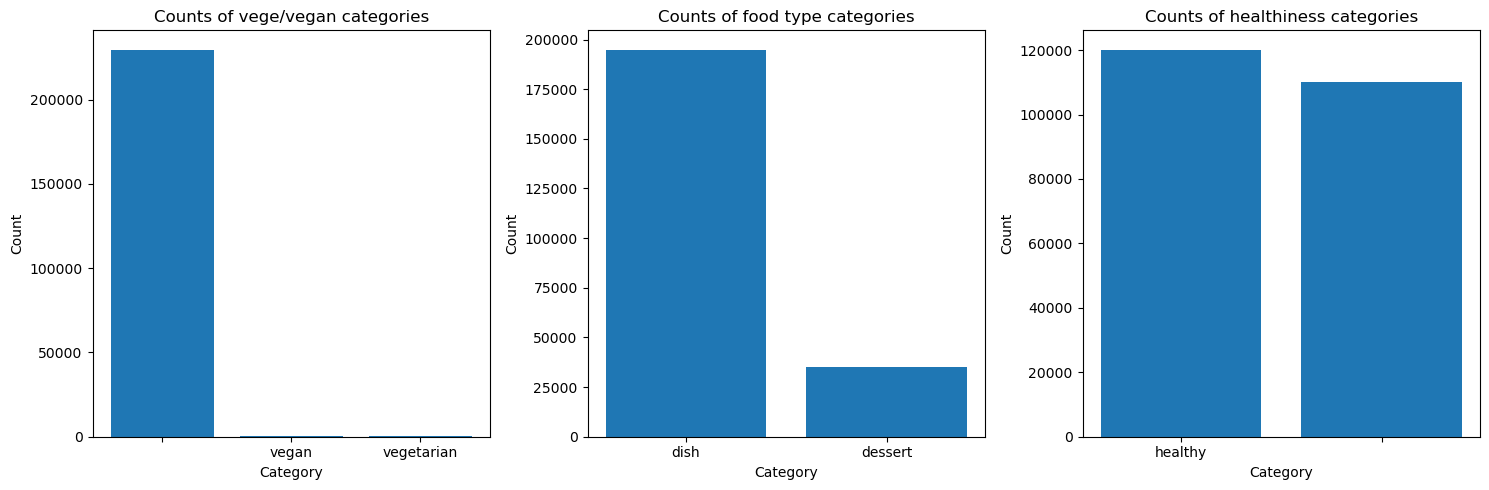

In [39]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

vege_counts = df3['vege/vegan'].value_counts()
axs[0].bar(vege_counts.index, vege_counts.values)
axs[0].set_title('Counts of vege/vegan categories')
axs[0].set_xlabel('Category')
axs[0].set_ylabel('Count')

food_type_counts = df3['food type'].value_counts()
axs[1].bar(food_type_counts.index, food_type_counts.values)
axs[1].set_title('Counts of food type categories')
axs[1].set_xlabel('Category')
axs[1].set_ylabel('Count')

healthiness_counts = df3['healthiness'].value_counts()
axs[2].bar(healthiness_counts.index, healthiness_counts.values)
axs[2].set_title('Counts of healthiness categories')
axs[2].set_xlabel('Category')
axs[2].set_ylabel('Count')

plt.tight_layout()

plt.show()


## 주 재료 (Meat)

In [40]:
# 키워드를 포함하는 값들을 컬럼에서 찾는다.
def get_words_by_keyword(df, keyword):
    words = df[df.columns[14:29]].applymap(lambda x: x if pd.notna(x) and keyword in x.lower() else '').values.flatten()
    words = [word for word in words if word != '']
    return words

In [41]:
# 컬럼에서 찾은 값들을 리스트에 담아 원하는 형태로 변경한다.
def replace_with_keyword_parts(row, keyword_parts, keyword, keyword_words):
    for col in row.index[14:29]:
        word = row[col]
        if pd.notna(word):
            if any(part in word for part in keyword_parts):
                for part in keyword_parts:
                    if part in word:
                        row[col] = keyword + ' ' + part
                        keyword_words.append(keyword + ' ' + part)
                        break
                    elif part in word.split():
                        row[col] = word.replace(part, keyword + ' ' + part)
                        keyword_words.append(keyword + ' ' + part)
                        break
            elif keyword in word:
                row[col] = keyword
                keyword_words.append(keyword)
    return row


#### Sausage

In [42]:
keyword = 'sausage'
sausage_words = get_words_by_keyword(df3, keyword)
print(sausage_words)

['sausage patty', 'italian sausage', 'italian sausage', 'andouille sausage', 'sausage', 'bulk pork sausage', 'little smokies sausages', 'sausage', 'sweet italian sausage', ' sausage', 'smoked sausage', 'smoked turkey sausage', 'sweet italian sausage link', 'bulk sausage', 'chorizo sausages', 'hot pork sausage', 'italian sausage', 'sausage', 'smoked sausage', 'italian sausage', 'smoked sausage', 'italian sausage', 'turkey sausage', 'mild italian sausage', 'sausage', 'mild sausage', ' sausage', 'sausage links', 'italian sausage', 'italian sausage', 'smoked sausage', 'sausage', 'andouille sausage', 'sweet italian sausage', 'smoked sausage', 'andouille sausages', 'italian sausage', 'hot italian sausage', 'bulk sausage', 'sausage', 'italian sausage', 'sweet italian sausage', 'sausage', 'chorizo sausage', 'sausages', 'sausages', 'bulk pork sausage', 'vegetarian sausages', 'sausage', 'sausage meat', 'chorizo sausage', 'summer sausage', 'italian sausage', 'italian sausage', 'andouille sausage'

In [43]:
sausage_parts = []

sausage_words = []
keyword = 'sausage'
df3 = df3.apply(lambda row: replace_with_keyword_parts(row, sausage_parts, keyword, sausage_words), axis=1)

sausage_words = list(set(sausage_words))

print(sausage_words)


['sausage']


#### Bacon

In [44]:
keyword = 'bacon'
bacon_words = get_words_by_keyword(df3, keyword)
print(bacon_words)

['bacon', 'bacon', 'bacon', 'bacon', 'unsmoked bacon', 'bacon', 'bacon', 'bacon', 'bacon', 'bacon', 'bacon', 'bacon grease', 'bacon', 'bacon', 'smoked bacon', 'bacon', 'bacon', 'bacon', 'bacon', 'bacon drippings', 'bacon', 'bacon', 'bacon', 'bacon', 'bacon', 'bacon grease', 'bacon', 'bacon', 'bacon', 'cooked bacon', 'bacon', 'bacon', 'cooked bacon', 'bacon bits', 'bacon', 'bacon', 'bacon', 'bacon bits', 'bacon grease', 'bacon', 'bacon', 'bacon grease', 'bacon', 'bacon', 'bacon', 'bacon', 'bacon', 'bacon', 'bacon', 'bacon', 'bacon', 'bacon', 'bacon', 'bacon bits', 'bacon', 'bacon bits', 'bacon', 'bacon', 'bacon', 'bacon drippings', 'bacon', 'bacon', 'cooked bacon', 'oscar mayer real bacon bits', 'canadian bacon', 'center-cut bacon', 'bacon', 'bacon', 'bacon bits', 'bacon', 'bacon', 'bacon', 'bacon', 'bacon', 'cooked bacon', 'bacos bacon bits', 'bacon', 'bacon', 'bacon', 'bacon', 'bacon', 'imitation bacon bits', 'bacon grease', 'bacon', 'bacon', 'bacon', 'bacon grease', 'canadian bacon',

In [45]:
bacon_parts = []

bacon_words = []
keyword = 'bacon'
df3 = df3.apply(lambda row: replace_with_keyword_parts(row, bacon_parts, keyword, bacon_words), axis=1)

bacon_words = list(set(bacon_words))

print(bacon_words)

['bacon']


#### Chicken

In [46]:
keyword = 'chicken'
chicken_words = get_words_by_keyword(df3, keyword)
print(chicken_words)


['boneless skinless chicken breast halves', 'smoked chicken', 'chicken breasts', 'cooked chicken', 'boneless chicken breast', 'boneless skinless chicken thighs', 'boneless skinless chicken breast', 'chicken', 'cooked chicken', 'chicken breasts', 'boneless skinless chicken breasts', 'boneless skinless chicken breasts', 'cooked chicken breasts', 'chicken pieces', 'chicken leg', 'cooked chicken', 'chicken breasts', 'chicken breast', 'skinless chicken breast half', 'chicken pieces', 'chicken pieces', 'chicken wings', 'canned chicken', 'chicken drummettes', 'chicken breasts', 'cooked chicken', 'chicken carcasses', 'chicken breasts', 'chicken bouillon', 'chicken', 'boneless chicken breast', 'chicken breasts', 'whole chicken', 'chicken breasts', 'boneless skinless chicken breasts', 'chicken breast', 'boneless skinless chicken breasts', 'boneless skinless chicken breasts', 'boneless skinless chicken breast halves', 'cooked chicken', 'boneless skinless chicken breast', 'vegan chicken', 'vegan c

In [47]:
chicken_parts = ['breast', 'thigh','wing']

chicken_words = []
keyword = 'chicken'
df3 = df3.apply(lambda row: replace_with_keyword_parts(row, chicken_parts, keyword, chicken_words), axis=1)

chicken_words = list(set(chicken_words))

print(chicken_words)

['chicken breast', 'chicken', 'chicken thigh', 'chicken wing']


#### Beef

In [48]:
keyword = 'beef'
beef_words = get_words_by_keyword(df3, keyword)
print(beef_words)

[' beef', 'vegetarian  beef', 'beef stew meat', ' beef', ' beef', ' beef', ' beef', 'beef', ' beef', 'beef steaks', 'lean  beef', 'beef consomme', 'lean  beef', ' beef', ' beef', 'roast beef', 'beef', ' beef', ' beef', ' beef', 'lean  beef', ' beef', 'lean  beef', ' beef', 'beef stew', ' beef', 'beef gravy', 'lean  beef', 'boneless eye of round beef steak', ' beef', 'beef stew meat', 'beef bouillon granules', 'extra lean  beef', ' beef', 'lean  beef', 'lean  beef', 'lean  beef', 'beef base', 'cooked  beef', 'beef gravy', ' beef', 'corned beef', ' beef', ' beef', 'lean  beef', ' beef', 'beef brisket', ' beef', ' beef', 'cooked beef', 'lean  beef', 'beef', 'lean  beef', ' beef', ' beef', ' beef', ' beef', ' beef', ' beef round', 'beef', ' beef', ' beef', 'lean  beef', 'lean  beef', ' beef', 'beef stew meat', 'lean  beef', 'boneless beef chuck roast', 'beef brisket', ' beef', 'beef bouillon', 'lean  beef', ' beef', ' beef', 'extra lean  beef', ' beef', 'beef bouillon concentrate', 'beef b

In [49]:
beef_parts = []

beef_words = []
keyword = 'beef'
df3 = df3.apply(lambda row: replace_with_keyword_parts(row, beef_parts, keyword, beef_words), axis=1)

beef_words = list(set(beef_words))


print(beef_words)



['beef']


#### Pork

In [50]:
keyword = 'pork'
pork_words = get_words_by_keyword(df3, keyword)
print(pork_words)

['lean pork chops', ' pork', ' pork', 'pork loin chops', 'lean pork', 'pork', ' pork', 'boneless pork chops', 'pork chops', 'boneless pork chops', 'pork chops', ' pork', 'boneless pork loin chops', 'boneless center cut pork chops', 'pork chops', 'pork and beans', 'cooked pork', 'pork chops', 'pork loin chops', 'pork tenderloin', ' lean pork', 'pork butt', 'pork fat', 'pork chops', 'pork roast', ' pork', 'pork tenderloin', 'pork tenderloin', 'pork butt', 'boneless pork chops', 'boneless pork chop', 'boneless pork chops', 'pork butt', 'pork and beans', 'pork and beans', 'pork loin roast', 'pork chops', 'boneless pork shoulder', 'pork chops', 'pork chops', 'boneless pork chops', 'boneless pork shoulder', 'pork & beans', 'pork tenderloin', 'pork chops', 'pork sirloin roast', ' pork', ' pork', 'pork chops', 'boneless pork loin', 'pork shoulder', 'pork hock', 'pork chops', 'pork chops', ' pork', 'pork tenderloin', 'pork', 'pork roast', 'pork chops', ' pork', 'boneless pork butt', ' pork', 'p

In [51]:
pork_parts = []

pork_words = []
keyword = 'pork'
df3 = df3.apply(lambda row: replace_with_keyword_parts(row, pork_parts, keyword, pork_words), axis=1)

pork_words = list(set(pork_words))

print(pork_words)


['pork']


#### Lamb

In [52]:
keyword = 'lamb'
lamb_words = get_words_by_keyword(df3, keyword)
print(lamb_words)

['lamb chops', 'boneless lamb shoulder', ' lamb', 'boneless leg of lamb', ' lamb', 'lamb chops', 'lamb shoulder', 'lamb shoulder', ' lamb', ' lamb', ' lamb', ' lamb', ' lamb', 'lamb shoulder', ' lamb', 'boneless leg of lamb', 'lamb loin chops', 'lamb stew meat', 'boneless leg of lamb', 'lamb', 'lamb', 'lamb', 'boneless lamb shoulder', 'lean lamb', 'leg of lamb', ' lamb', 'leg of lamb', 'leg of lamb', 'leg of lamb', 'lamb shanks', ' lamb', 'boneless lamb shoulder', 'lamb', ' lamb', 'leg of lamb', 'lamb', 'lean lamb', ' lamb', ' lamb', 'lamb', 'boneless leg of lamb', ' lamb', 'leg of lamb', 'lamb loin chops', 'leg of lamb', 'leg of lamb', 'leg of lamb', ' lamb', 'boneless leg of lamb', 'lamb shanks', 'boneless lean lamb', 'rack of lamb', 'lamb racks', 'lamb shanks', 'boneless leg of lamb', 'lamb loin chops', 'shoulder lamb chop', ' lamb', 'lamb loin chops', 'lamb steaks', 'lamb chops', 'lamb stew meat', 'lamb', 'lamb', 'lamb shoulder', 'boneless lamb shoulder', 'lamb chops', 'lamb cutlet

In [53]:
lamb_parts = []

lamb_words = []
keyword = 'lamb'
df3 = df3.apply(lambda row: replace_with_keyword_parts(row, lamb_parts, keyword, lamb_words), axis=1)

lamb_words = list(set(lamb_words))

print(lamb_words)


['lamb']


#### Meat

In [54]:
keyword = 'meat'

def get_meat_words(row):
    words = row[row.str.contains(keyword, case=False, na=False, regex=True)]
    return words.values

# Apply the function to each column of the DataFrame and combine the results
meat_words = df3[df3.columns[14:29]].apply(get_meat_words).explode().dropna().unique().tolist()

# Display the words containing or exactly matching "meat"
print(meat_words)


['meatloaf mixture', 'lump crabmeat', 'meatball', ' meat substitute', 'crabmeat', 'stew meat', 'whale meat', 'canned crabmeat', 'mincemeat', 'imitation crabmeat', 'meat', ' buffalo meat', 'hamburger meat', 'backfin crab meat', 'lean  meat', ' lump crabmeat', 'pasta sauce with meat', 'turtle meat', 'smoked meat', 'coconut meat', 'goat meat', ' meat', 'meat drippings', 'dungeness crabmeat', 'frozen crabmeat', 'basic meatloaf', 'meatless spaghetti sauce', 'boneless duck meat', 'jumbo lump crab meat', 'turkey meat', ' crabmeat', 'blue crab meat', 'white crab meat', 'crab claw meat', 'crawfish tail meat', 'lobster meat', ' deer meat', 'horse meat', 'venison stew meat', 'king crab meat', 'lean meat', 'elk meat', 'meatloaf', 'cooked lobster meat', 'chestnut meats', 'lean stew meat', 'alligator meat', 'goose meat', 'calf meat', 'juices from cooked meat', 'minced meat', 'kangaroo mincemeat', 'tomato-based meat sauce', 'meat tenderizer', 'meatloaf mix', 'cooked dark turkey meat', 'lobster tail m

In [55]:
# meat이 들어간 단어들 삭제
keyword = 'meat'
meat_rows_count = df3[df3[df3.columns[14:29]].apply(lambda x: x.str.contains(keyword, case=False, regex=True)).any(axis=1)].shape[0]

print(f"{meat_rows_count}")

2793


In [56]:
len(df)

230319

In [57]:
total_meat_words = []
total_meat_words.extend(pork_words)
total_meat_words.extend(beef_words)
total_meat_words.extend(chicken_words)
total_meat_words.extend(lamb_words)
total_meat_words.extend(sausage_words)
total_meat_words.extend(bacon_words)
print(total_meat_words)
len(total_meat_words)

['pork', 'beef', 'chicken breast', 'chicken', 'chicken thigh', 'chicken wing', 'lamb', 'sausage', 'bacon']


9

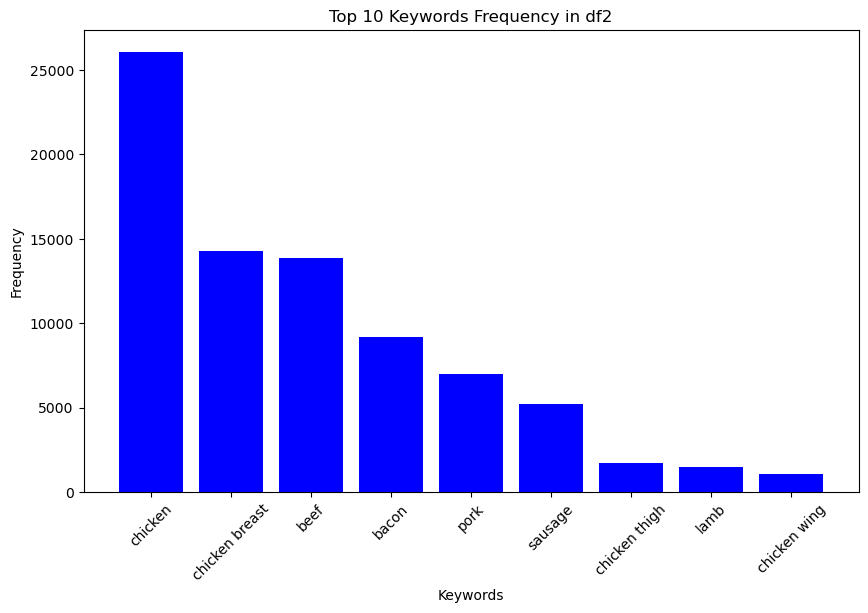

In [58]:
keyword_counts = {}
for keyword in total_meat_words:
    count = sum(df3[df3.columns[14:29]].apply(lambda x: x.str.contains(keyword, case=False, regex=True)).any(axis=1))
    keyword_counts[keyword] = count

sorted_keywords = sorted(keyword_counts.items(), key=lambda x: x[1], reverse=True)

top_n = 10
top_keywords = [keyword[0] for keyword in sorted_keywords[:top_n]]
top_frequencies = [keyword[1] for keyword in sorted_keywords[:top_n]]

plt.figure(figsize=(10, 6))
plt.bar(top_keywords, top_frequencies, color='b')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Keywords Frequency in df2')
plt.xticks(rotation=45)
plt.show()

In [59]:
top_15_meat = sorted_keywords[:15]
top_15_meat

[('chicken', 26054),
 ('chicken breast', 14280),
 ('beef', 13870),
 ('bacon', 9181),
 ('pork', 6994),
 ('sausage', 5204),
 ('chicken thigh', 1705),
 ('lamb', 1480),
 ('chicken wing', 1085)]

## 주 재료 (Vegetable)

In [60]:
vegetables_greens_mushrooms = ['artichoke', 'artichokes',
                               'asparagus', 'asparaguses',
                               'avocado', 'avocados',
                               'arugula', 'arugulas',
                               'beet', 'beets',
                               'bell pepper', 'bell peppers',
                               'bok choy', 'bok choys',
                               'broccoli', 'broccolis',
                               'brussels sprout', 'brussels sprouts',
                               'cabbage', 'cabbages',
                               'carrot', 'carrots',
                               'cauliflower', 'cauliflowers',
                               'celery', 'celeries',
                               'chard', 'chards',
                               'collard greens', 'collard greenses',
                               'corn', 'corns',
                               'cucumber', 'cucumbers',
                               'eggplant', 'eggplants',
                               'endive', 'endives',
                               'fennel', 'fennels',
                               'garlic', 'garlics',
                               'ginger', 'gingers',
                               'green bean', 'green beans',
                               'kale', 'kales',
                               'leek', 'leeks',
                               'lettuce', 'lettuces',
                               'mushroom', 'mushrooms',
                               'okra', 'okras',
                               'onion', 'onions',
                               'pea', 'peas',
                               'portobello mushroom', 'portobello mushrooms',
                               'potato', 'potatoes',
                               'pumpkin', 'pumpkins',
                               'radicchio', 'radicchios',
                               'radish', 'radishes',
                               'spinach', 'spinaches',
                               'sweet potato', 'sweet potatoes',
                               'tomato', 'tomatoes',
                               'turnip', 'turnips',
                               'zucchini', 'zucchinis'
]

In [61]:
vegetables_greens_mushrooms = [item for item in vegetables_greens_mushrooms if df3.iloc[: ,14:29].isin([item]).any().any()]

vegetables_greens_mushrooms

['artichoke',
 'artichokes',
 'asparagus',
 'avocado',
 'avocados',
 'arugula',
 'beet',
 'beets',
 'bok choy',
 'broccoli',
 'brussels sprout',
 'brussels sprouts',
 'cabbage',
 'carrot',
 'carrots',
 'cauliflower',
 'celery',
 'collard greens',
 'corn',
 'cucumber',
 'cucumbers',
 'endive',
 'endives',
 'fennel',
 'garlic',
 'ginger',
 'green beans',
 'kale',
 'leek',
 'leeks',
 'lettuce',
 'mushroom',
 'mushrooms',
 'okra',
 'onion',
 'peas',
 'potato',
 'potatoes',
 'pumpkin',
 'radicchio',
 'radish',
 'radishes',
 'spinach',
 'sweet potato',
 'sweet potatoes',
 'tomatoes',
 'turnip',
 'turnips',
 'zucchini']

In [62]:
for word in vegetables_greens_mushrooms:
    df3.iloc[:, 14:29] = df3.iloc[:, 14:29].apply(lambda x: x.str.replace('.*' + word + ',*', word, case=False, regex=True))

In [63]:
wlem = nltk.WordNetLemmatizer()
vege_mush_le = []
for word in vegetables_greens_mushrooms:
    new_word = wlem.lemmatize(word)
    vege_mush_le.append(new_word)

In [64]:
unique_vege_mush_le = []
for item in vege_mush_le:
    if item not in unique_vege_mush_le:
        unique_vege_mush_le.append(item)

print(unique_vege_mush_le)

['artichoke', 'asparagus', 'avocado', 'arugula', 'beet', 'bok choy', 'broccoli', 'brussels sprout', 'brussels sprouts', 'cabbage', 'carrot', 'cauliflower', 'celery', 'collard greens', 'corn', 'cucumber', 'endive', 'fennel', 'garlic', 'ginger', 'green beans', 'kale', 'leek', 'lettuce', 'mushroom', 'okra', 'onion', 'pea', 'potato', 'pumpkin', 'radicchio', 'radish', 'spinach', 'sweet potato', 'sweet potatoes', 'tomato', 'turnip', 'zucchini']


In [65]:
unique_vege_mush_le = sorted(unique_vege_mush_le)
if 'brussels sprouts' in unique_vege_mush_le:
    unique_vege_mush_le.remove('brussels sprouts')
if 'sweet potatoes' in unique_vege_mush_le:
    unique_vege_mush_le.remove('sweet potatoes')
unique_vege_mush_le
len(unique_vege_mush_le)

36

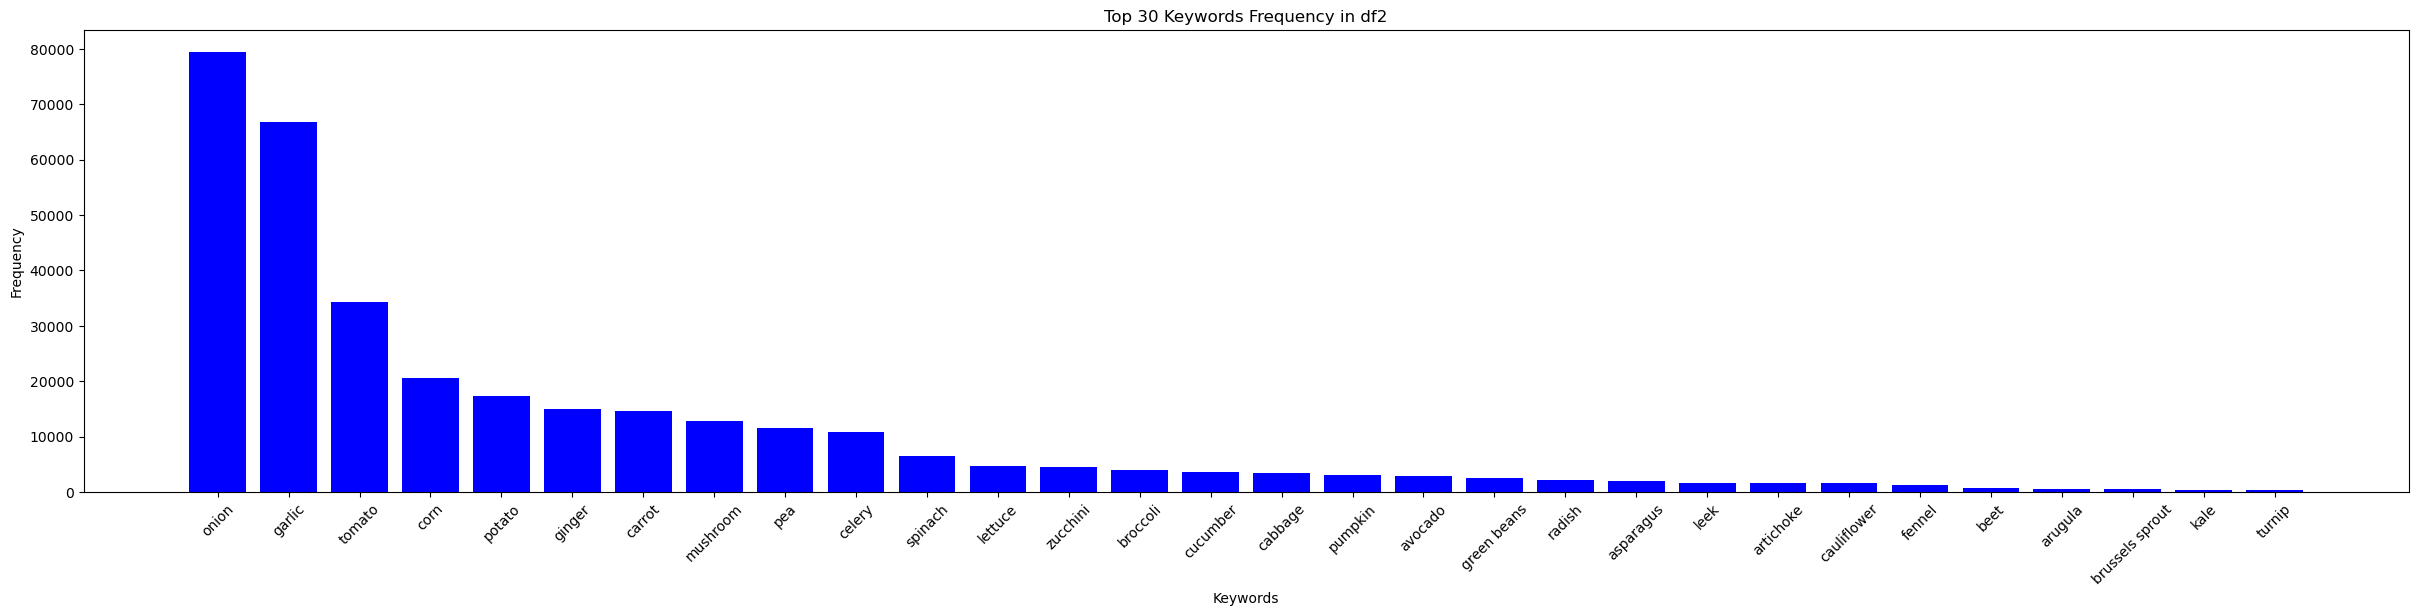

In [66]:
keyword_counts = {}
for keyword in unique_vege_mush_le:
    count = sum(df3[df3.columns[14:29]].apply(lambda x: x.str.contains(keyword, case=False, regex=True)).any(axis=1))
    keyword_counts[keyword] = count

sorted_keywords = sorted(keyword_counts.items(), key=lambda x: x[1], reverse=True)

top_n = 30
top_keywords = [keyword[0] for keyword in sorted_keywords[:top_n]]
top_frequencies = [keyword[1] for keyword in sorted_keywords[:top_n]]

plt.figure(figsize=(30, 6))
plt.bar(top_keywords, top_frequencies, color='b')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Keywords Frequency in df2')
plt.xticks(rotation=45)
plt.show()

## Fruit

In [67]:
fruits_list = ['apple','banana','orange','grape','strawberry','blueberry','watermelon','mango','pineapple','kiwi','pear','peach','plum',
    'cherry','raspberry','blackberry','lemon','lime','coconut','pomegranate','apricot','cantaloupe','honeydew melon',
    'grapefruit','avocado','fig','papaya','guava','passion fruit','dragon fruit','kiwifruit','tangerine','clementine','date',
    'persimmon','cranberry','lychee','jackfruit','nectarine','star fruit','mulberry','quince','elderberry','rhubarb',
    'gooseberry','soursop','boysenberry','persimmon','plantain','tamarind','longan','kiwiberry','sugar apple','ackee',
    'blackcurrant','guinep','chirimoya','sapote','medlar','carambola','ugli fruit','saskatoon berry','sweetsop','mangosteen','breadfruit',
    'salak','pawpaw','feijoa','durian','lingonberry','custard apple','rambutan','loguat','damson plum','carissa','santol',
    'african cucumber','chayote','ground cherry','jambul','wood apple','mamey sapote','jabuticaba','langsat','feijoa','quandong','cupuaçu',
    'cupressus cashmeriana','cupressus torulosa','quince','morus','acai','calabash','jaboticaba','grumichama','bignay',
    'cornelian cherry','cudrania','szechuan pepper','bush tomato','cape gooseberry','bitter melon','physalis','kiwifruit','sugar plum',
    'feijoa','black sapote','silk floss tree','strawberry guava','thimbleberry','elderberry','kerson fruit','canistel','barbados cherry',
    'cannonball fruit','red currant','black currant','quandong','jaboticaba','longan','cloudberry','cotton candy grape','dewberry','mamoncillo',
    'egg fruit','cactoid cactoid','snake fruit','brazilian pawpaw','limeberry','saguaro','monkey orange','wax jambu','araza','cacay','karanda'
]

In [68]:
fruits_list = [item for item in fruits_list if df3.iloc[2:].isin([item]).any().any()]

fruits_list
len(fruits_list)

47

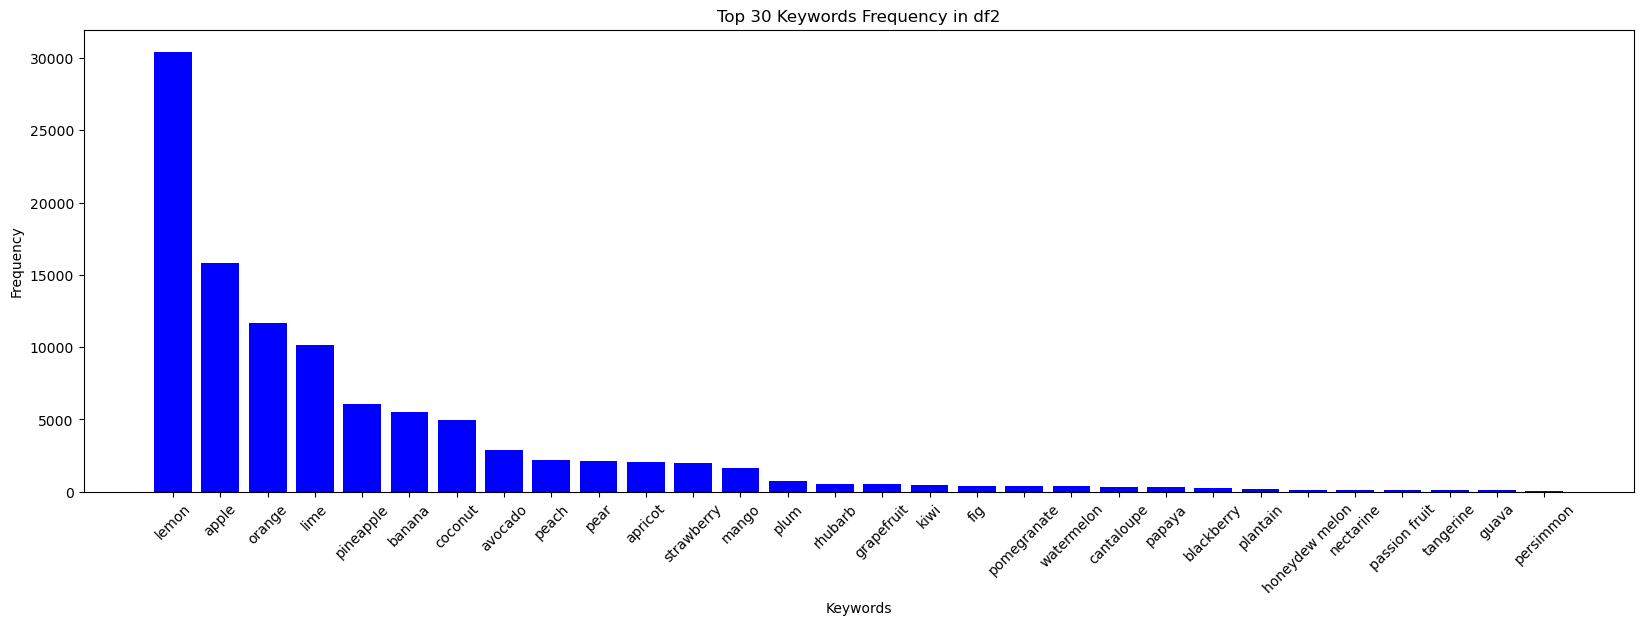

In [69]:
keyword_counts = {}
for keyword in fruits_list:
    count = sum(df3[df3.columns[14:29]].apply(lambda x: x.str.contains(keyword, case=False, regex=True)).any(axis=1))
    keyword_counts[keyword] = count

sorted_keywords = sorted(keyword_counts.items(), key=lambda x: x[1], reverse=True)

top_n = 30
top_keywords = [keyword[0] for keyword in sorted_keywords[:top_n]]
top_frequencies = [keyword[1] for keyword in sorted_keywords[:top_n]]

plt.figure(figsize=(20, 6))
plt.bar(top_keywords, top_frequencies, color='b')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Keywords Frequency in df2')
plt.xticks(rotation=45)
plt.show()

## Dessert

In [70]:
dessert_list = ['Sugar','Flour','Butter','Egg','Milk','Vanilla Extract','Chocolate','Cocoa Powder','Cake Mix','Cream','Yogurt','Strawberry','Raspberry','Blueberry',
    'Banana','Lemon','Mint','Walnut','Almond','Pecan','Caramel','Coffee','Melon','Pineapple','Meringue','Nuts','Blackberry','Grapefruit','Lime','Passion Fruit'
]
dessert_list = [ingredient.lower() for ingredient in dessert_list]

In [71]:
dessert_list = [item for item in dessert_list if df3.iloc[2:].isin([item]).any().any()]

dessert_list
len(dessert_list)

25

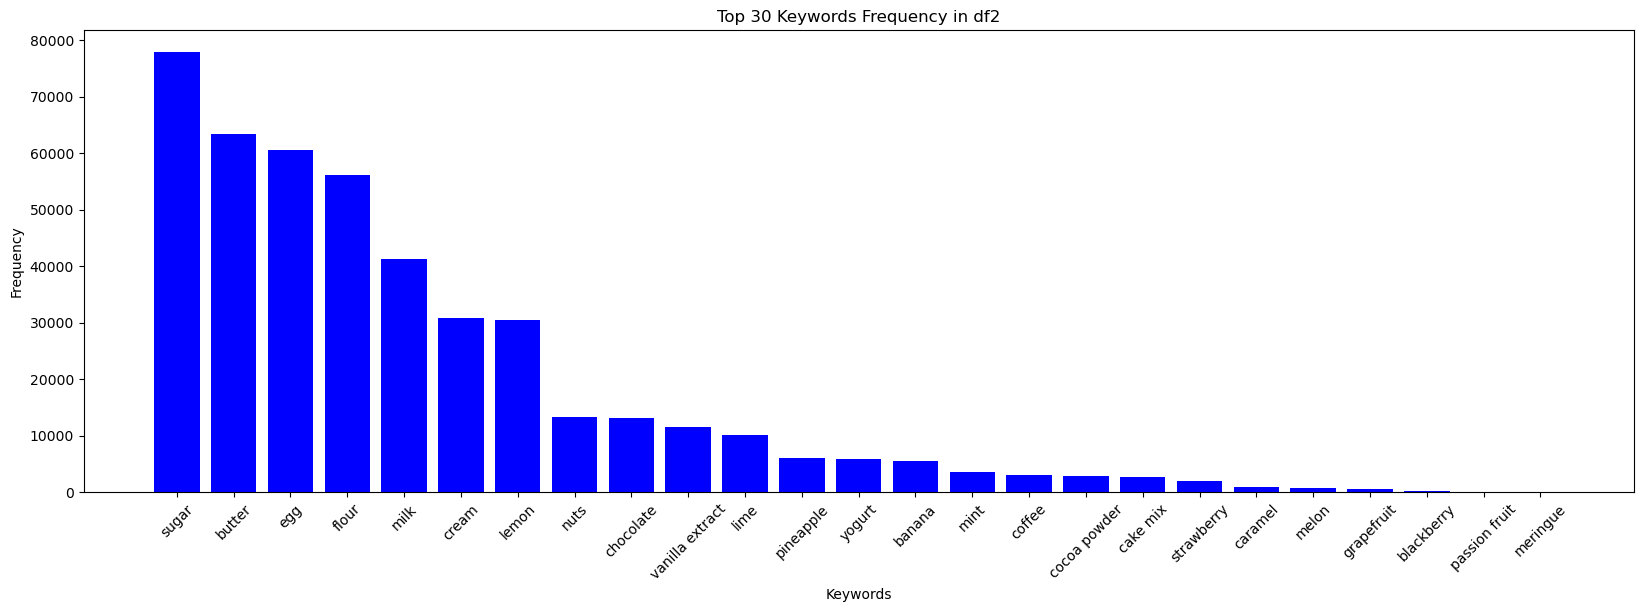

In [72]:
keyword_counts = {}
for keyword in dessert_list:
    count = sum(df3[df3.columns[14:29]].apply(lambda x: x.str.contains(keyword, case=False, regex=True)).any(axis=1))
    keyword_counts[keyword] = count

sorted_keywords = sorted(keyword_counts.items(), key=lambda x: x[1], reverse=True)

top_n = 30
top_keywords = [keyword[0] for keyword in sorted_keywords[:top_n]]
top_frequencies = [keyword[1] for keyword in sorted_keywords[:top_n]]

plt.figure(figsize=(20, 6))
plt.bar(top_keywords, top_frequencies, color='b')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Keywords Frequency in df2')
plt.xticks(rotation=45)
plt.show()

In [73]:
df4 = df3.copy()

~~~
output 고려하여 기존 ingredients 컬럼 생성 

In [74]:
df4['ingredients'] = df['ingredients'].reindex(df4.index)

df4 = df4.reset_index(drop=True)


In [77]:
df4.to_csv('recipes_eda.csv', index=False)

In [76]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230186 entries, 0 to 230185
Data columns (total 33 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   name           230185 non-null  object 
 1   id             230186 non-null  int64  
 2   minutes        230186 non-null  int64  
 3   n_steps        230186 non-null  int64  
 4   steps          230186 non-null  object 
 5   description    225249 non-null  object 
 6   n_ingredients  230186 non-null  int64  
 7   calories       230186 non-null  float64
 8   total fat      230186 non-null  float64
 9   sugar          230186 non-null  float64
 10  sodium         230186 non-null  float64
 11  protein        230186 non-null  float64
 12  saturated fat  230186 non-null  float64
 13  carbohydrates  230186 non-null  float64
 14  0              230186 non-null  object 
 15  1              230161 non-null  object 
 16  2              228043 non-null  object 
 17  3              221276 non-nul

In [78]:
final_class = [
    "sausage", "bacon", "chicken breast", "chicken thigh", "chicken wing", "beef", "pork", "lamb", "rib", "ham",
    "onion", "garlic", "tomato", "corn", "potato", "ginger", "carrot", "pea", "mushroom", "celery", "spinach",
    "zucchini", "broccoli", "cucumber", "cabbage", "pumpkin", "avocado", "green beans", "radish", "asparagus",
    "leek", "cauliflower", "eggplant", "fennel", "lettuce", "chilli", "sweet potato", "lemon", "apple", "orange",
    "lime", "coconut", "pineapple", "banana", "avocado", "peach", "pear", "apricot", "strawberry", "mango",
    "grapefruit", "watermelon", "plantain", "tangerine", "cream", "chocolate", "yogurt", "sugar", "butter",
    "cheese", "egg", "flour", "milk", "rice", "tofu", "noodle", "oil", "salt"
]


In [79]:
len(final_class)

68